# Outline

* SST data
* Model fitting of SST data, whose components include: local level, local linear trend, seasonal trend.
* Generating a posterior distribution of our model time series.
* Some heuristic comparisons between the different models

## Setup

In [1]:
library(readr)
library(bsts)

Warning message:
"package 'readr' was built under R version 4.0.3"
Warning message:
"package 'bsts' was built under R version 4.0.3"
Loading required package: BoomSpikeSlab

Warning message:
"package 'BoomSpikeSlab' was built under R version 4.0.3"
Loading required package: Boom

Warning message:
"package 'Boom' was built under R version 4.0.3"
Loading required package: MASS


Attaching package: 'Boom'


The following object is masked from 'package:stats':

    rWishart



Attaching package: 'BoomSpikeSlab'


The following object is masked from 'package:stats':

    knots


Loading required package: zoo


Attaching package: 'zoo'


The following objects are masked from 'package:base':

    as.Date, as.Date.numeric


Loading required package: xts


Attaching package: 'bsts'


The following object is masked from 'package:BoomSpikeSlab':

    SuggestBurn




In [2]:
gibralter <- read_csv("data/gilbraltersimple.csv")


-- Column specification --------------------------------------------------------
cols(
  tempMean = col_double()
)




In [3]:
head(gibralter)

tempMean
1 17.04675
2 17.26283
3 17.08680
4 17.36750
5 16.29200
6 17.22120

In [4]:
gilt <- ts(gibralter$tempMean, start=c(2004,1,13), 
           end=c(2017,11,25), frequency=30)

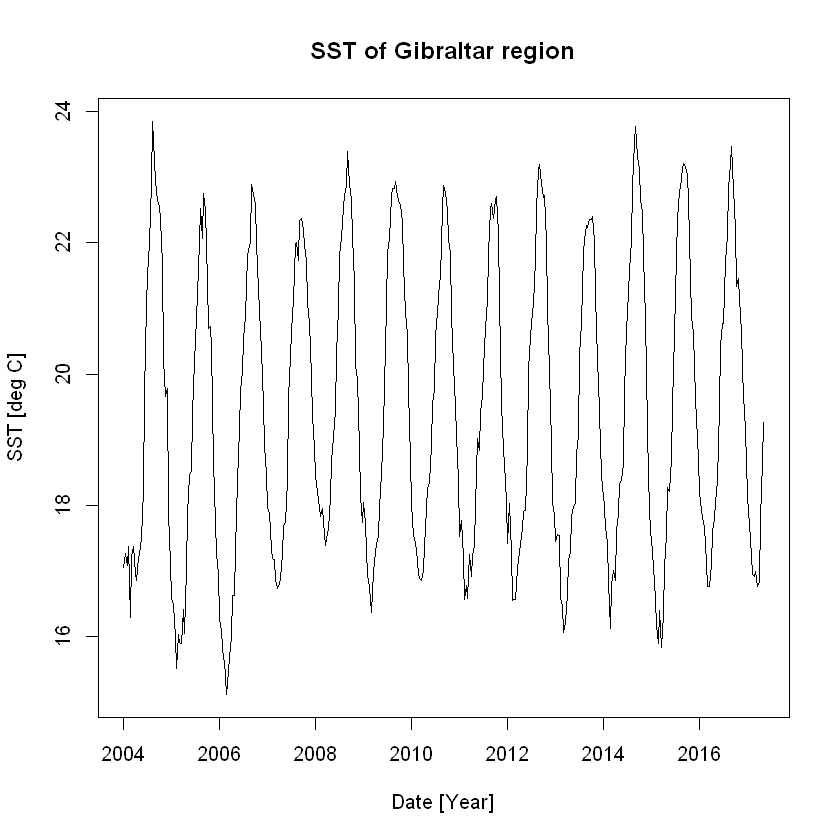

In [5]:
plot(gilt, main='SST of Gibraltar region',
    xlab="Date [Year]", ylab="SST [deg C]")

## Model fitting

Local level model
<br><br>
$$
y_{t} = \mu_{t} + \varepsilon_{t}\quad \varepsilon_{t} \sim \mathcal{N}(0, \sigma^{2}_{\varepsilon})
$$
$$
\mu_{t + 1} = \mu_{t} + \xi_{t} \quad \xi_{t} \sim \mathcal{N}(0, \sigma^{2}_{\xi})
$$

In [13]:
ll_ss <- list()
ll_ss <- AddLocalLevel(state.specification = ll_ss, y = gilt)
ll_fit <- bsts(gilt, state.specification = ll_ss, niter = 1e3)
# MCMC iterations = 1000

=-=-=-=-= Iteration 0 Thu Feb 25 02:19:16 2021
 =-=-=-=-=
=-=-=-=-= Iteration 100 Thu Feb 25 02:19:16 2021
 =-=-=-=-=
=-=-=-=-= Iteration 200 Thu Feb 25 02:19:17 2021
 =-=-=-=-=
=-=-=-=-= Iteration 300 Thu Feb 25 02:19:17 2021
 =-=-=-=-=
=-=-=-=-= Iteration 400 Thu Feb 25 02:19:18 2021
 =-=-=-=-=
=-=-=-=-= Iteration 500 Thu Feb 25 02:19:18 2021
 =-=-=-=-=
=-=-=-=-= Iteration 600 Thu Feb 25 02:19:18 2021
 =-=-=-=-=
=-=-=-=-= Iteration 700 Thu Feb 25 02:19:19 2021
 =-=-=-=-=
=-=-=-=-= Iteration 800 Thu Feb 25 02:19:19 2021
 =-=-=-=-=
=-=-=-=-= Iteration 900 Thu Feb 25 02:19:19 2021
 =-=-=-=-=


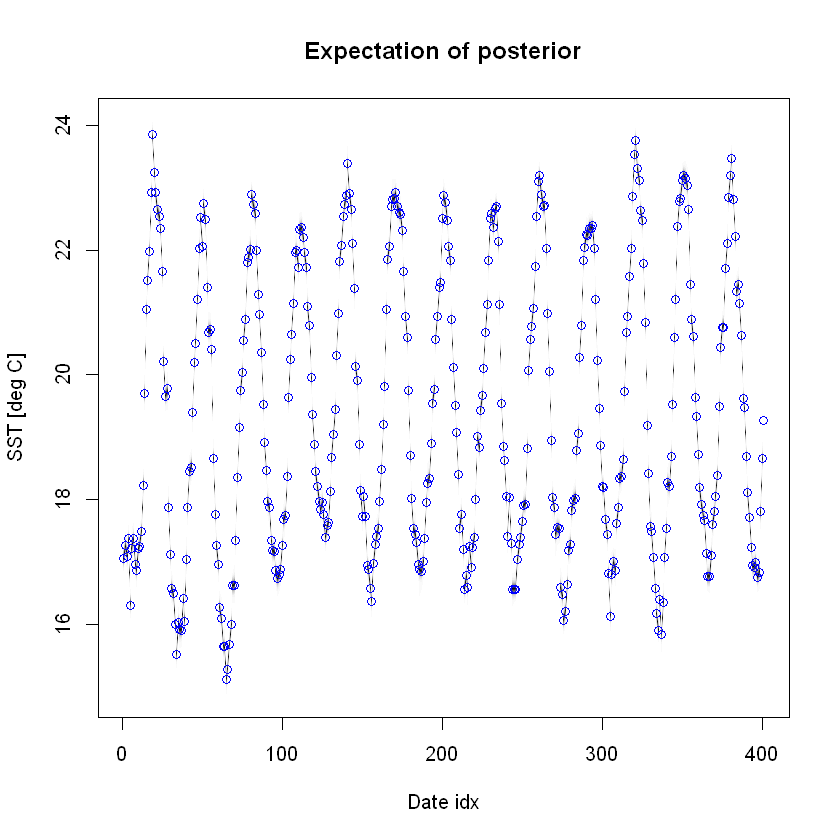

In [14]:
plot(ll_fit, main="Expectation of posterior",
    xlab='Date idx', ylab = 'SST [deg C]')

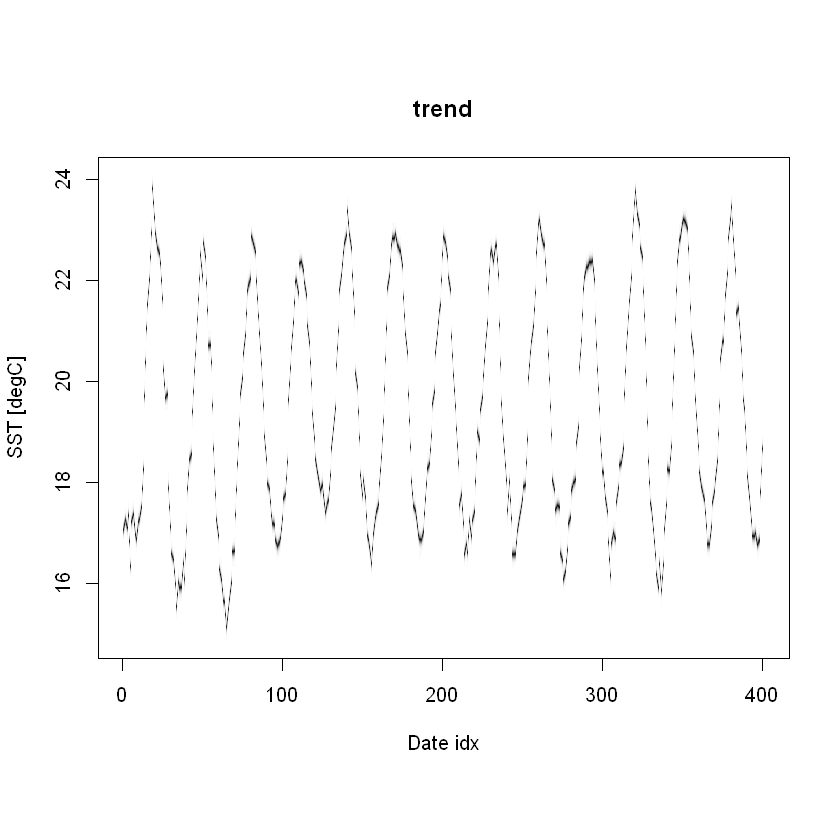

In [15]:
# Posterior state components
plot(ll_fit, 'components',
    xlab = 'Date idx', ylab='SST [degC]')

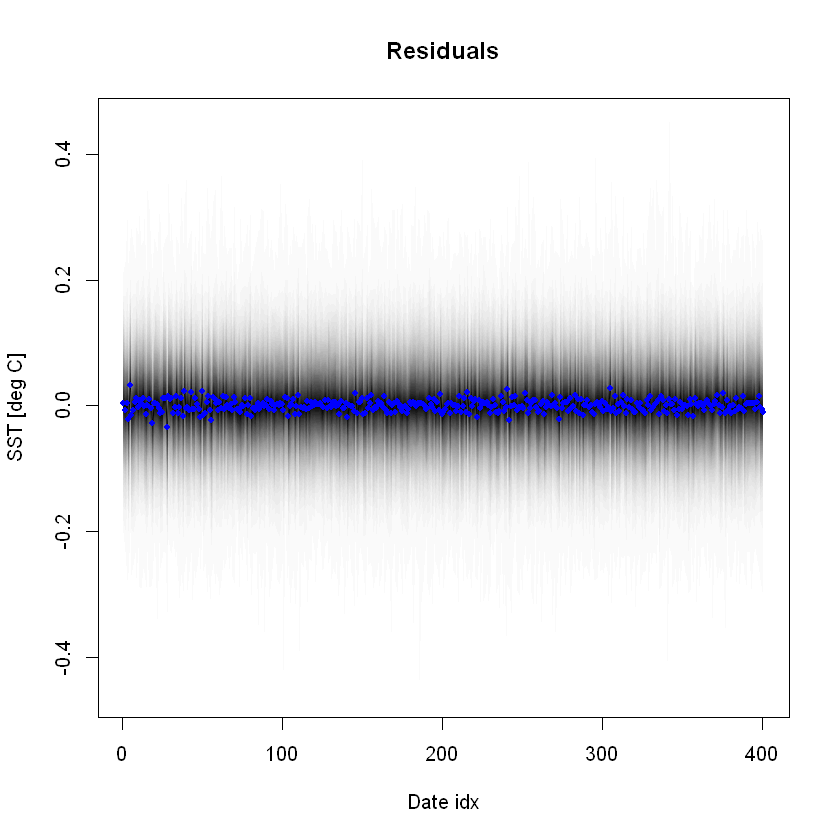

In [16]:
# plot residuals
plot(ll_fit, 'residuals', main = "Residuals",
    xlab = 'Date idx', ylab="SST [deg C]")

In [18]:
# plot forecast
ll_pred <- predict(ll_fit, horizon = 30)
plot(ll_pred, plot.original = 90, # plot 90 time step of the original ts alongside with the forecast
    main = 'Local linear forecasts',
    xlab = 'Date idx', ylab = 'SST [deg C]')

* Blue line : median of predicted distribution
* green line: prediction intervals (95% credible intervals: default)
* grey shadding: posterior density distribution